In [4]:
import numpy as np 
import pandas as pd 


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error


Using TensorFlow backend.
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [5]:
data = pd.read_csv(r"C:\Users\PC\Downloads\AAPL.csv")

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.548414,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.517582,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.657520,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.965857,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.222006,134247600


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


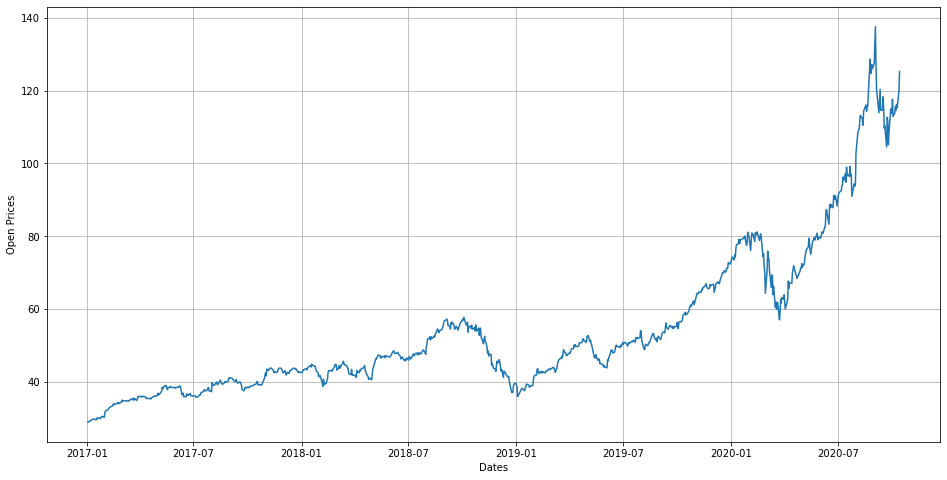

In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv(r"C:\Users\PC\Downloads\AAPL.csv", sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'])

In [9]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.548414,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.517582,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.657520,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.965857,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.222006,134247600
...,...,...,...,...,...,...
2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200
2020-10-09,115.279999,117.000000,114.919998,116.970001,116.970001,100506900


No handles with labels found to put in legend.


          t-1       t+1
t-1  1.000000  0.815301
t+1  0.815301  1.000000


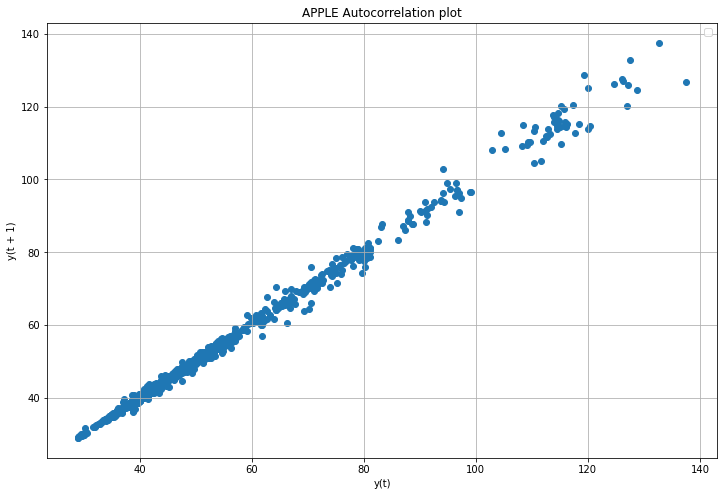

In [10]:
from pandas.plotting import lag_plot
plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=1)
plt.title('APPLE Autocorrelation plot')
plt.grid(True)
plt.legend();

from pandas import DataFrame
from pandas import concat
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200
2020-10-09,115.279999,117.000000,114.919998,116.970001,116.970001,100506900
2020-10-12,120.059998,125.180000,119.279999,124.400002,124.400002,240226800
2020-10-13,125.269997,125.389999,119.650002,121.099998,121.099998,261686100


In [21]:
work = data.copy()
work['Daily'] = work['High'] - work['Low']

In [27]:
from numpy import std, average 
print(" Daily Moving High: ", max(work['Daily']))
print(" Daily Moving Average: ", average(work['Daily']))
print(" Daily Moving STD: ", std(work['Daily']))

 Daily Moving High:  12.809997999999993
 Daily Moving Average:  1.1713235283613443
 Daily Moving STD:  1.1957528839519247


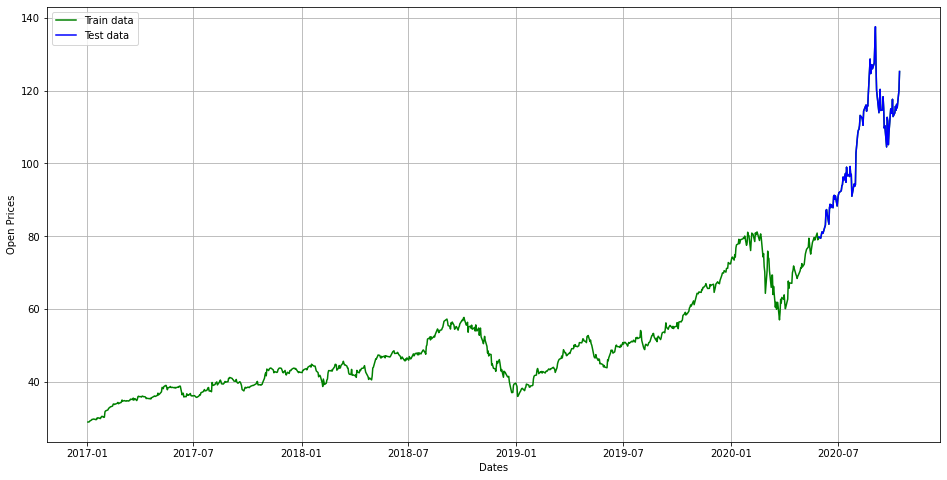

In [12]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

# AR

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\Use

Lag: 21
MSE: 12.839570537423455
MAE: 2.5852978996547837
RMSE: 3.5832346472738084


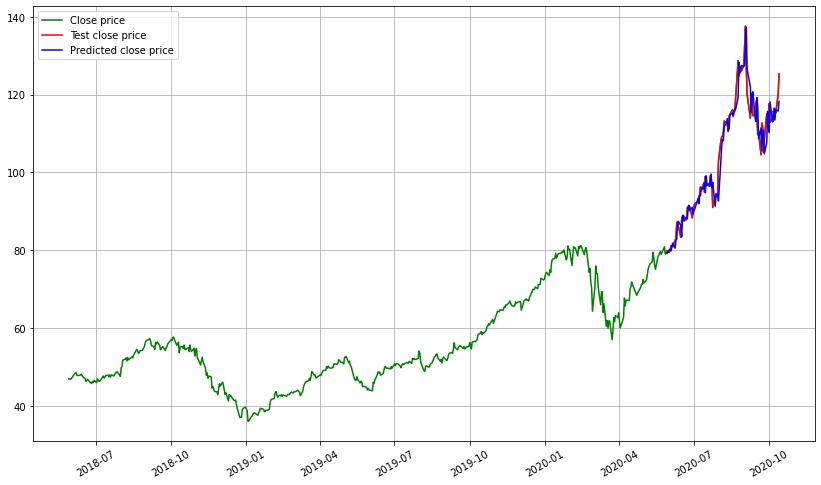

In [13]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

train_ar = train_data['Open']
test_ar = test_data['Open']
# train autoregression
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)
    
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data['Open'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Open'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Open'], predictions))
print('RMSE: '+str(rmse))

plt.savefig('ar_model.pdf')

# ARIMA

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


<Figure size 1152x576 with 0 Axes>

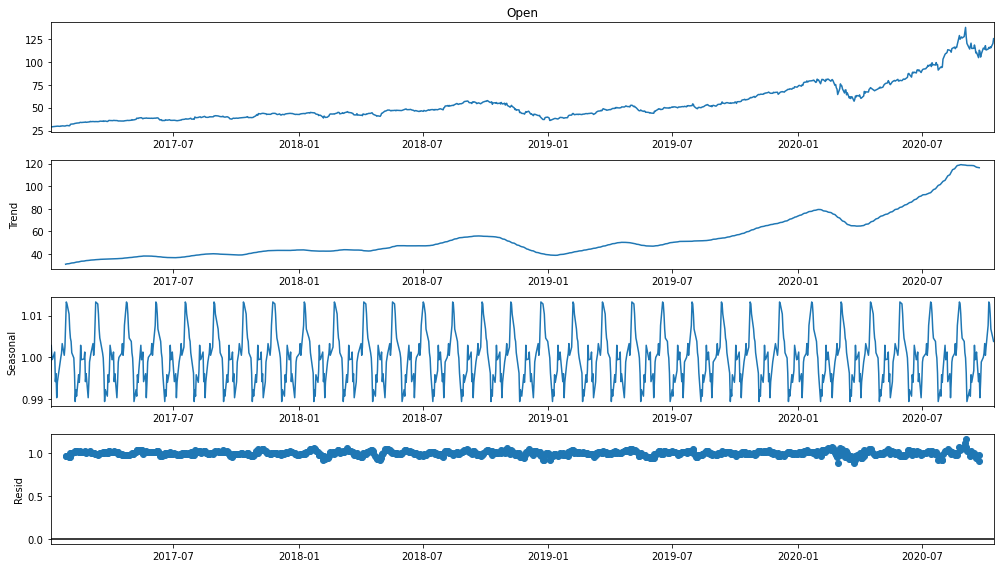

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [16]:
train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 11.511350871658385
MAE: 2.4303830305795855
RMSE: 3.3928381735146735


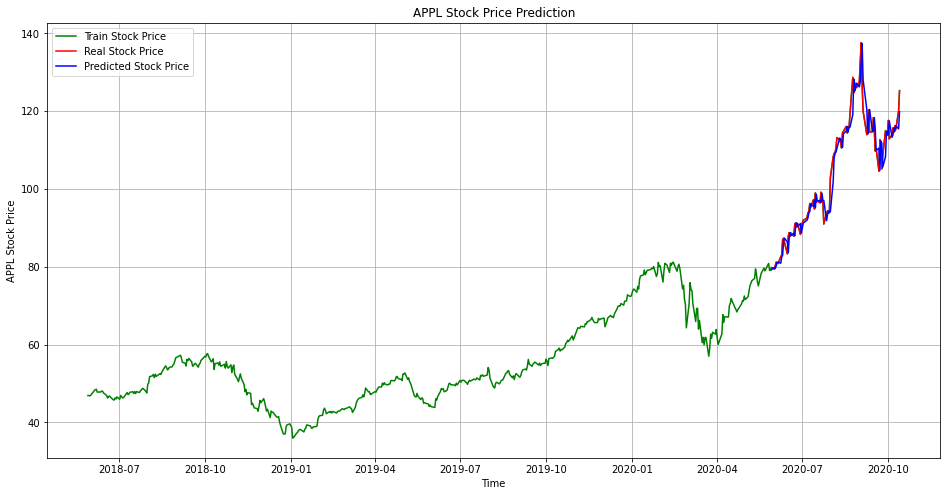

In [17]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('APPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPL Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()